Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo.

El objetivo de este pair programming es:

* Hacer una exploración inicial del dataframe.
* ¿Cuántas filas tiene?
* ¿Cuántas nulos tiene?
* ¿Y duplicados?
* ¿Qué tipo de datos tenemos en el dataframe?
* etc.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

>
> `Enlace a la leyenda del Dataset:`
>
>  https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download
>

In [3]:
df = pd.read_csv('ds_salaries.csv', index_col =0)

In [4]:
# Comprobamos su forma

df.shape

(607, 11)

In [5]:
# Chequeamos los nulos y no tiene, está muy limpio

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Exploramos el nombre de sus columnas y el tipo de dato

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [7]:
# Calculamos los estadísticos generales para categóricas y numericas, ya que tenemos gran cantidad de variables categóricas

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Exploramos las filas duplicadas

df.duplicated().sum()

42

In [9]:
# Vemos que no hay duplicados de fila completos, solo de algunas columnas. Vamos a comprobar si hay indices duplicados

df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [10]:
# No hay indices duplicados, por lo que nuestro conjunto de datos está listo para analizar!

df.index.duplicated().sum()

0


* Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.


In [11]:
# 1. ¿Cuánto se gana segun la experiencia?
# 2. ¿Cuál es el salario máximo y mínimo y la experiencia y puesto de cada uno?
# 3. ¿Qué puesto de trabajo cobra más en USD?
# 4. Frecuencia de job title y en que paises estan los mas frecuentes
# 5. El nivel de experiencia en el sector data por paises
# 6. ¿Cuántos trabajan de forma remota desde otro pais?
# 7. ¿Con cuanta experiencia trabajan mas en remoto?



* Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.


In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# 1. ¿Cuánto se gana segun la experiencia? (* Leyenda al final)

df['experience_level']
df['salary_in_usd']

df['rangos_salario'] = pd.cut(df['salary_in_usd'], bins = (2000, 50000, 100000, 200000, 400000, 600000), labels = ['muy bajo', 'bajo', 'medio', 'alto', 'muy alto'])
crosstab = pd.crosstab(df['experience_level'], df['rangos_salario'])
crosstab

rangos_salario,muy bajo,bajo,medio,alto,muy alto
experience_level,,,,,
EN,38,40,8,2,0
EX,0,4,12,8,2
MI,58,89,60,3,3
SE,11,62,171,34,2


In [14]:
## * Leyenda: EN - Junior | Entry level ; MI - Middle level | Intermediate ; SE - Senior level | Expert ; EX - Expert level | Director

In [15]:
# 2. ¿Cuál es el salario máximo y mínimo y la experiencia y puesto de cada uno?

max = df['salary_in_usd'].max()
min = df['salary_in_usd'].min()


In [16]:
print('El salario máximo es', max)
print('------------')
print('El nivel de esta persona es:\n', df[df['salary_in_usd'] == max]['experience_level'].values)

El salario máximo es 600000
------------
El nivel de esta persona es:
 ['EX']


In [17]:
print('El salario mínimo es', min)
print('------------')
print('El nivel de esta persona :\n', df[df['salary_in_usd'] == min]['experience_level'].values)

El salario mínimo es 2859
------------
El nivel de esta persona :
 ['MI']


In [18]:
# Nos sorprende que una persona con nivel intermedio sea la que cobre el salario mínimo, tendríamos que comprobar su procedencia y la de su empresa para ver si no es un dato erroneo.

In [19]:
# 3. ¿Qué puesto de trabajo cobra más en USD?
df_max_salaries = df.groupby('job_title')['salary_in_usd'].agg(salario_máximo = 'max').reset_index()
df_max_salaries

,job_title,salario_máximo
0,3D Computer Vision Researcher,5409
1,AI Scientist,200000
2,Analytics Engineer,205300
3,Applied Data Scientist,380000
4,Applied Machine Learning Scientist,423000
5,BI Data Analyst,150000
6,Big Data Architect,99703
7,Big Data Engineer,114047
8,Business Data Analyst,135000
9,Cloud Data Engineer,160000


In [20]:
df_max_salaries['salario_máximo'].max()

600000

In [21]:
df_max_salaries.loc[df_max_salaries['salario_máximo'] == 600000]

,job_title,salario_máximo
45,Principal Data Engineer,600000


In [22]:
#Duda: ¿Cómo se puede sacar el máximo salario y el puesto de trabajo a la vez sin tener que averiguar su valor primero?

[Text(0, 0, 'Data Scientist'),
 Text(1, 0, 'Machine Learning Scientist'),
 Text(2, 0, 'Big Data Engineer'),
 Text(3, 0, 'Product Data Analyst'),
 Text(4, 0, 'Machine Learning Engineer'),
 Text(5, 0, 'Data Analyst'),
 Text(6, 0, 'Lead Data Scientist'),
 Text(7, 0, 'Business Data Analyst'),
 Text(8, 0, 'Lead Data Engineer'),
 Text(9, 0, 'Lead Data Analyst'),
 Text(10, 0, 'Data Engineer'),
 Text(11, 0, 'Data Science Consultant'),
 Text(12, 0, 'BI Data Analyst'),
 Text(13, 0, 'Director of Data Science'),
 Text(14, 0, 'Research Scientist'),
 Text(15, 0, 'Machine Learning Manager'),
 Text(16, 0, 'Data Engineering Manager'),
 Text(17, 0, 'Machine Learning Infrastructure Engineer'),
 Text(18, 0, 'ML Engineer'),
 Text(19, 0, 'AI Scientist'),
 Text(20, 0, 'Computer Vision Engineer'),
 Text(21, 0, 'Principal Data Scientist'),
 Text(22, 0, 'Data Science Manager'),
 Text(23, 0, 'Head of Data'),
 Text(24, 0, '3D Computer Vision Researcher'),
 Text(25, 0, 'Data Analytics Engineer'),
 Text(26, 0, 'App

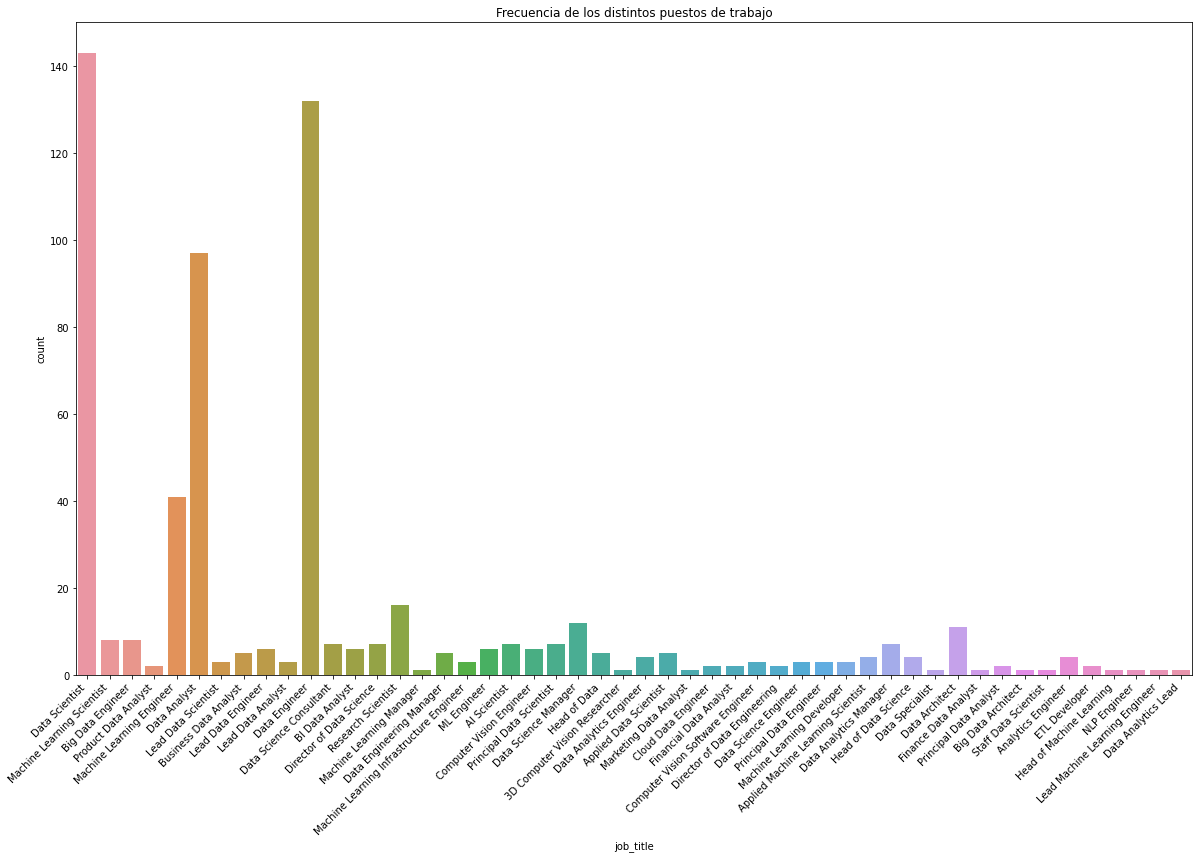

In [23]:
# 4. Frecuencia de job title y en qué paises estan los mas frecuentes?

# Vamos a hacer un countplot para visualizarlo

fig, ax = plt.subplots(figsize=(20, 12))

plt.title('Frecuencia de los distintos puestos de trabajo')
sns.countplot(x = 'job_title', data= df)
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # esta línea de código nos sirve para rotar las etiquetas y que no se superpongan


In [24]:
# Hemos encontrado en internet lo que necesitábamos: Vamos a hacer una tabla de frecuencias doble
# Podríamos hacer otro countplot y ver los países más frecuentes, pero no sabríamos exactamente qué puesto de trabajo es más frecuente en cada país frecuente

In [25]:
crosstab = pd.crosstab(index= df['job_title'], columns= df['employee_residence'], margins = True)
crosstab.head()


employee_residence,AE,AR,AT,AU,BE,BG,BO,BR,CA,CH,...,RS,RU,SG,SI,TN,TR,UA,US,VN,All
job_title,,,,,,,,,,,,,,,,,,,,,
3D Computer Vision Researcher,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AI Scientist,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,7
Analytics Engineer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,4
Applied Data Scientist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,5
Applied Machine Learning Scientist,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,4


In [26]:
# Y ahora extraemos los puestos de trabajo que ya sabemos que son los más frecuentes

crosstab_freq_jobs = crosstab.loc[['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer'],:].T
crosstab_freq_jobs


job_title,Data Scientist,Data Analyst,Data Engineer,Machine Learning Engineer
employee_residence,,,,
AE,0,0,0,2
AR,0,0,0,0
AT,1,0,1,0
AU,1,0,0,1
BE,0,0,0,2
BG,0,1,0,0
BO,0,0,0,0
BR,2,0,0,0
CA,6,9,0,0


In [27]:
# Llegadas hasta aquí, no sabemos cómo extraer de forma precisa los países más frecuentes de cada puesto de trabajo más frecuente, pero lo podemos ver de forma visual:
## Donde más hay de todos los puestos es en US (EE.UU), seguido de lejos por GB (Reino Unido), DE (Alemania) y CA (Canada)


In [28]:
# 5.Los niveles de experiencia en el sector data por paises


In [29]:
# Nos basamos en este filtro para hacer un bucle for:
df[df['employee_residence'] == 'US']['experience_level'].value_counts()

SE    211
MI     77
EN     29
EX     15
Name: experience_level, dtype: int64

In [30]:

for country in df['employee_residence']:
    print('En', country, ':')
    print('El número de los empleados en data y su experiencia es:\n',df[df['employee_residence'] == country]['experience_level'].value_counts())
    print('----------------------------')

En DE :
El número de los empleados en data y su experiencia es:
 MI    8
EN    8
SE    7
EX    2
Name: experience_level, dtype: int64
----------------------------
En JP :
El número de los empleados en data y su experiencia es:
 MI    3
SE    2
EN    2
Name: experience_level, dtype: int64
----------------------------
En GB :
El número de los empleados en data y su experiencia es:
 MI    30
SE     9
EN     5
Name: experience_level, dtype: int64
----------------------------
En HN :
El número de los empleados en data y su experiencia es:
 MI    1
Name: experience_level, dtype: int64
----------------------------
En US :
El número de los empleados en data y su experiencia es:
 SE    211
MI     77
EN     29
EX     15
Name: experience_level, dtype: int64
----------------------------
En US :
El número de los empleados en data y su experiencia es:
 SE    211
MI     77
EN     29
EX     15
Name: experience_level, dtype: int64
----------------------------
En US :
El número de los empleados en data 

In [31]:
# Vamos a centrarnos en los países más frecuentes:
most_freq_countries = ['US', 'DE', 'GB', 'CA']

for country in most_freq_countries:
    print('En', country, ':')
    print('El número de los empleados en data y su experiencia es:\n',df[df['employee_residence'] == country]['experience_level'].value_counts())
    print('----------------------------')

En US :
El número de los empleados en data y su experiencia es:
 SE    211
MI     77
EN     29
EX     15
Name: experience_level, dtype: int64
----------------------------
En DE :
El número de los empleados en data y su experiencia es:
 MI    8
EN    8
SE    7
EX    2
Name: experience_level, dtype: int64
----------------------------
En GB :
El número de los empleados en data y su experiencia es:
 MI    30
SE     9
EN     5
Name: experience_level, dtype: int64
----------------------------
En CA :
El número de los empleados en data y su experiencia es:
 SE    14
MI    10
EN     3
EX     2
Name: experience_level, dtype: int64
----------------------------


In [32]:
# Sería interesante guardar esto en un nuevo dataframe, al que cada fila de 'employee_residence' le correspondieran las cuatro distintas opciones de 'experience_level', algún día llegaremos :)

In [38]:
# Probando con groupby por dos columnas si!!
df_country_experience = df.groupby(['employee_residence', 'experience_level']).size().reset_index()
df_country_experience[df_country_experience['employee_residence'].isin(['US', 'DE', 'GB', 'CA'])]

,employee_residence,experience_level,0
14,CA,EN,3
15,CA,EX,2
16,CA,MI,10
17,CA,SE,14
23,DE,EN,8
24,DE,EX,2
25,DE,MI,8
26,DE,SE,7
38,GB,EN,5
39,GB,MI,30


In [ ]:
# 6. ¿Cuántos trabajan de forma remota desde otro pais?

df[df['employee_residence'] != df['company_location']].head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,rangos_salario
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S,medio
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M,bajo
32,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L,bajo
40,2020,MI,FT,Data Scientist,45760,USD,45760,PH,100,US,S,muy bajo
53,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,100,DE,L,bajo


In [ ]:
print(df[df['employee_residence'] != df['company_location']].shape[0], 'empleados trabajan de forma remota desde otro país')

51 empleados trabajan de forma remota desde otro país


In [ ]:
# 7. ¿Cuánta experiencia tienen los que trabajan más en remoto?

df[df['remote_ratio']>=80]['experience_level'].value_counts()


SE    199
MI    115
EN     49
EX     18
Name: experience_level, dtype: int64

In [ ]:
# Como conclusión interesante: hay más juniors que experts o directores trabajando de forma remota!